# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
# Create a new dataframe from your CSV
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [2]:
# Print out any information you need to understand your dataframe
df.head()
df.shape #(23486, 11)
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

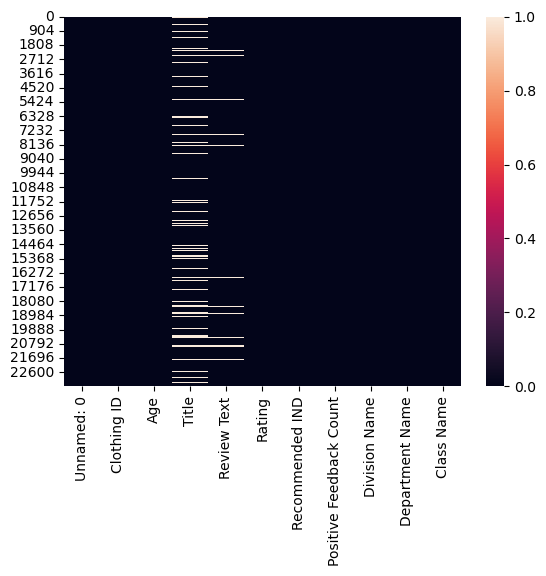

In [3]:
# Plot a heatmap of any missing data
cols = df.columns[:30]
sns.heatmap(df[cols].isnull())

In [4]:
# Try out a missing data percentage list! 
for col in df.columns:
    num_missing = df[col].isnull().sum()
    pct_missing = df[col].isnull().mean()*100
    print(f"{col}: {round(pct_missing,2)}% ({num_missing})")

Unnamed: 0: 0.0% (0)
Clothing ID: 0.0% (0)
Age: 0.0% (0)
Title: 16.22% (3810)
Review Text: 3.6% (845)
Rating: 0.0% (0)
Recommended IND: 0.0% (0)
Positive Feedback Count: 0.0% (0)
Division Name: 0.06% (14)
Department Name: 0.06% (14)
Class Name: 0.06% (14)


Title is missing
Review Text is missing
Division Name is missing
Department Name is missing
Class Name is missing


<AxesSubplot:xlabel='index'>

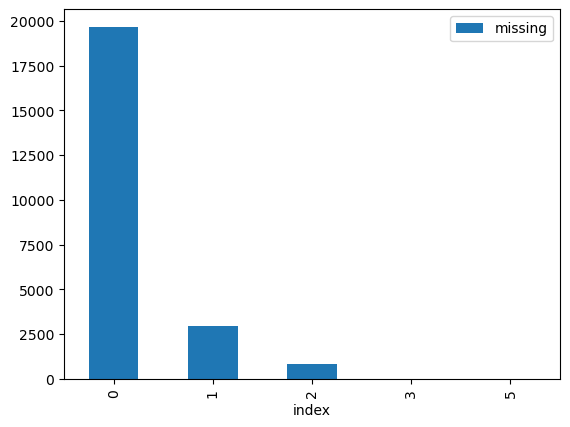

In [5]:
# Plot a missing data histogram
for col in df.columns:
    missing = df[col].isnull()
    num_missing = sum(missing)
    
    if num_missing > 0:
        print(f"{col} is missing")
        df[f"{col}_ismissing"] = missing

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['missing'] = df[ismissing_cols].sum(axis = 1)
df['missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='missing')

    


Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [6]:
# Handle any missing data in your dataframe.
for col in df.columns:
    missing = df[col].isnull().sum()
    if missing > 0: 
        df[col] = df[col].fillna("_MISSING_")
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_ismissing,Review Text_ismissing,Division Name_ismissing,Department Name_ismissing,Class Name_ismissing,missing
0,0,767,33,_MISSING_,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,True,False,False,False,False,1
1,1,1080,34,_MISSING_,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,True,False,False,False,False,1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,False,False,False,False,False,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,False,False,False,False,False,0
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,False,False,False,False,False,0


## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

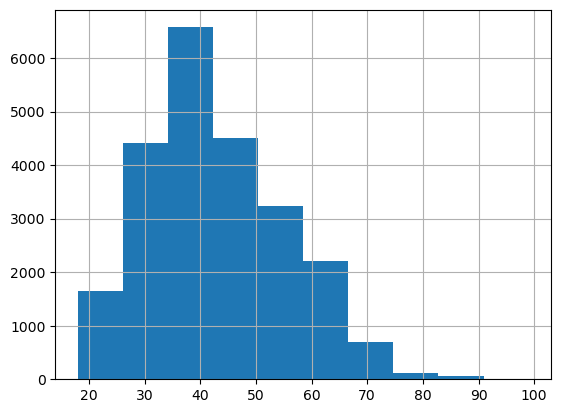

In [7]:
# Plot a histogram to see if there are any outliers.
df["Age"].hist()
#df["Clothing ID"].hist()                       
#df["Rating"].hist()                                   
#df["Positive Feedback Count"].hist()

In [8]:
# Use the describe() method
df["Age"].describe()
#df["Clothing ID"].describe()                       
#df["Rating"].describe()                                   
#df["Positive Feedback Count"].describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

<AxesSubplot:>

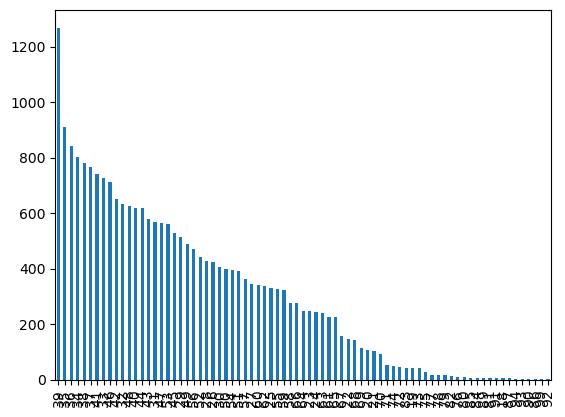

In [9]:
# Plot a bar chart
df["Age"].value_counts().plot.bar(rot = 90)

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [10]:
# Handle any outliers in your dataframe 

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [14]:
# Look for any irrelevant data in the dataframe. How will you handle it?
#df = df.drop(["Title", "Review Text"],axis = 1)
df

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_ismissing,Review Text_ismissing,Division Name_ismissing,Department Name_ismissing,Class Name_ismissing,missing
0,0,767,33,4,1,0,Initmates,Intimate,Intimates,True,False,False,False,False,1
1,1,1080,34,5,1,4,General,Dresses,Dresses,True,False,False,False,False,1
2,2,1077,60,3,0,0,General,Dresses,Dresses,False,False,False,False,False,0
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants,False,False,False,False,False,0
4,4,847,47,5,1,6,General,Tops,Blouses,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,5,1,0,General Petite,Dresses,Dresses,False,False,False,False,False,0
23482,23482,862,48,3,1,0,General Petite,Tops,Knits,False,False,False,False,False,0
23483,23483,1104,31,3,0,1,General Petite,Dresses,Dresses,False,False,False,False,False,0
23484,23484,1084,28,3,1,2,General,Dresses,Dresses,False,False,False,False,False,0


In [21]:
# Look for duplicates. How will you handle any duplicates?
key = ["Clothing ID", "Age", "Rating", "Recommended IND", "Positive Feedback Count", "Division Name", "Class Name"]

df.groupby(key)["Clothing ID"].count().sort_values(ascending = False).head(40
                                                                          )

Clothing ID  Age  Rating  Recommended IND  Positive Feedback Count  Division Name   Class Name
1094         39   5       1                0                        General         Dresses       12
1078         39   5       1                0                        General         Dresses       12
                                                                    General Petite  Dresses       11
1081         39   5       1                0                        General Petite  Dresses       10
1094         35   5       1                0                        General         Dresses        9
1078         42   5       1                0                        General         Dresses        8
             35   5       1                0                        General Petite  Dresses        8
862          40   5       1                0                        General         Knits          8
872          32   5       1                0                        General         Knits        

In [25]:
df_dupdrop = df.drop_duplicates(subset = key)
#df.shape
df_dupdrop.shape

(20506, 15)

In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
#the clothing ID might be uninformative or the class name which seems to be repetitive of the department name

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [26]:
# Try to convert all the strings in a column to lower or upper case. 
df['Class Name'] = df['Class Name'].str.lower()
df['Class Name'].value_counts()

dresses           6319
knits             4843
blouses           3097
sweaters          1428
pants             1388
jeans             1147
fine gauge        1100
skirts             945
jackets            704
lounge             691
swim               350
outerwear          328
shorts             317
sleep              228
legwear            165
intimates          154
layering           146
trend              119
_missing_           14
casual bottoms       2
chemises             1
Name: Class Name, dtype: int64